# HOMEWORK 1 Q1
## Group 24: Jaswanth Kranthi Boppana, Manav Mandal, Sayan Das, Vishnuvardhan Reddy Kollu

A) In this question, we import the "happiness_data.csv" file, summarize the data and talk about the various attributes.

**NOTE: Add the "happiness_data.csv" file in the Files section of Google collab to ensure that the file is detected. This needs to be repeated in every individual run.**

The idea is to split the dataset into training and test subsets, train various models of regression on the training subset and predict the values of the test subset. Our target variable is "Life Ladder".

The description of the attributes are as follows-
* Country name: name of the country
* Year: year data was collected
* Life ladder: information about how happy people are
* Log GDP per capita: market values of goods and services in a country
* Social support: how people feel they are supported by those around them
* Healthy life expectancy: rank of the country based on the happiness score
* Freedom to make life choices: how much freedom contributes to one’s feeling of happiness
* Generosity: have you donated money
* Perceptions of corruption: how do people perceive that there is corruption
* Positive affect: do you feel happiness, laughter and enjoyment?
* Negative affect: do you feel worry, anger or sadness?

In [47]:
#importing all the required modules
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [48]:
#importing the dataset and reading it using pandas
data_set=pd.read_csv('happiness_data.csv')

In [49]:
#viewing first few rows of the dataset
data_set.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

From the above dataset, we are removing the year column and country name column. Our initial runs have depicted that the year and the name of a country has minimal correlation among the attributes, and logically do not contribute much to a person's happiness.

In [50]:
data_set.drop(['year'],axis=1,inplace=True)
data_set.head()

Country name  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan        3.724               7.370           0.451   
1  Afghanistan        4.402               7.540           0.552   
2  Afghanistan        4.758               7.647           0.539   
3  Afghanistan        3.832               7.620           0.521   
4  Afghanistan        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [51]:
data_set.drop(['Country name'],axis=1,inplace=True)
data_set.head()

Life Ladder  Log GDP per capita  Social support  \
0        3.724               7.370           0.451   
1        4.402               7.540           0.552   
2        4.758               7.647           0.539   
3        3.832               7.620           0.521   
4        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [52]:
data_set.shape

(1949, 9)

1. In this dataset, we have a total of 1949 instances and 9 attributes.

2. Among these, 'Life ladder' is the target attribute and the the other 8 are continuous data. The attributes- "Country name" and "year" was categorical data which have been removed due to no apparent influence on the target data.





In [53]:
#getting the info of the dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1949 non-null   float64
 1   Log GDP per capita                1913 non-null   float64
 2   Social support                    1936 non-null   float64
 3   Healthy life expectancy at birth  1894 non-null   float64
 4   Freedom to make life choices      1917 non-null   float64
 5   Generosity                        1860 non-null   float64
 6   Perceptions of corruption         1839 non-null   float64
 7   Positive affect                   1927 non-null   float64
 8   Negative affect                   1933 non-null   float64
dtypes: float64(9)
memory usage: 137.2 KB


B) In this question, we examine the statistical values of the dataset and visualize the distribution of each attribute using histograms.

In [54]:
#identifying the statistical values of the features in the dataset
data_set.describe()

Life Ladder  Log GDP per capita  Social support  \
count  1949.000000         1913.000000     1936.000000   
mean      5.466705            9.368453        0.812552   
std       1.115711            1.154084        0.118482   
min       2.375000            6.635000        0.290000   
25%       4.640000            8.464000        0.749750   
50%       5.386000            9.460000        0.835500   
75%       6.283000           10.353000        0.905000   
max       8.019000           11.648000        0.987000   

       Healthy life expectancy at birth  Freedom to make life choices  \
count                       1894.000000                   1917.000000   
mean                          63.359374                      0.742558   
std                            7.510245                      0.142093   
min                           32.300000                      0.258000   
25%                           58.685000                      0.647000   
50%                           65.200000                      0.763000   
75%                           68.590000                      0.856000   
max                           77.100000                      0.985000   

        Generosity  Perceptions of corruption  Positive affect  \
count  1860.000000                1839.000000      1927.000000   
mean      0.000103                   0.747125         0.710003   
std       0.162215                   0.186789         0.107100   
min      -0.335000                   0.035000         0.322000   
25%      -0.113000                   0.690000         0.625500   
50%      -0.025500                   0.802000         0.722000   
75%       0.091000                   0.872000         0.799000   
max       0.698000                   0.983000         0.944000   

       Negative affect  
count      1933.000000  
mean          0.268544  
std           0.085168  
min           0.083000  
25%           0.206000  
50%           0.258000  
75%           0.320000  
max           0.705000

array([[<Axes: title={'center': 'Life Ladder'}>,
        <Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>],
       [<Axes: title={'center': 'Healthy life expectancy at birth'}>,
        <Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>],
       [<Axes: title={'center': 'Perceptions of corruption'}>,
        <Axes: title={'center': 'Positive affect'}>,
        <Axes: title={'center': 'Negative affect'}>]], dtype=object)

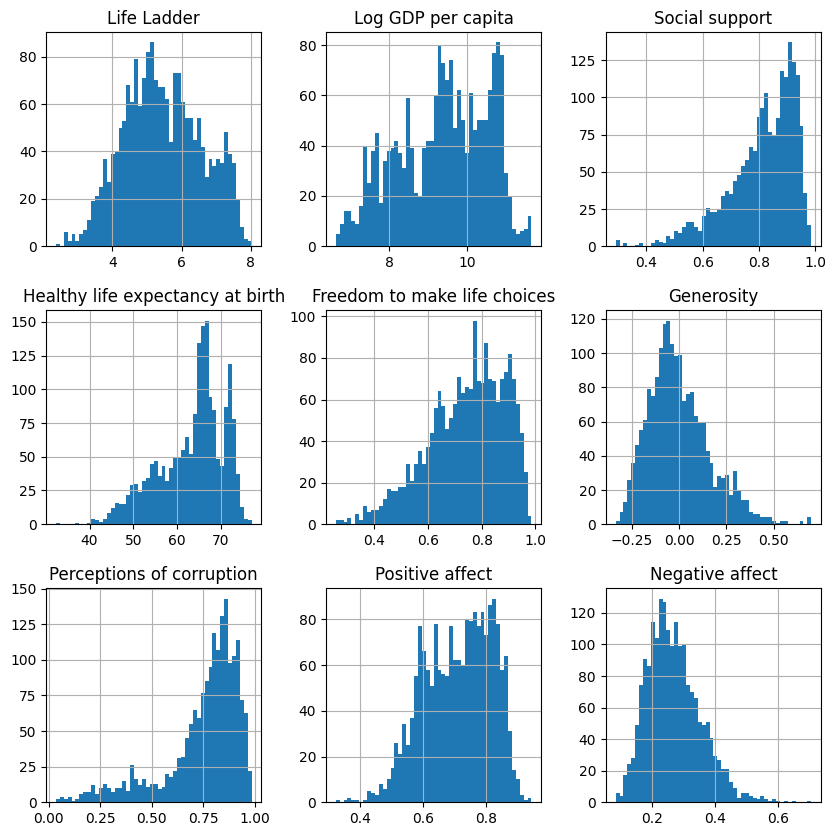

In [55]:
#histogram Representation of the dataset to undersand the attributes and there orentation
data_set.hist(bins=50,figsize=(10,10))

In [56]:
#special treatments that are required
# checking the existance of null variables
data_set.isna().sum()

Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

The above output sheds light on the presence of empty or NaN values in the dataset. Without any loss of generalisation, we decided to get rid of instances where attribute values are missing.

In [57]:
# performing special treatment for the data
# 1. removing the null instances as they are minimal compared to the whole dataset
data_set.dropna(inplace=True)
data_set.isna().sum()
# now we can see that there are no null values

Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

The above output confirms that the NaN data has been dealt with. Next up, we redistribute the original dataframe "data_set" into a new one called df. This ensures that we preserve the original dataset and provides us the "df" to run the various models on.

In [58]:
df = data_set[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices' ,'Generosity' ,'Perceptions of corruption' ,'Positive affect', 'Negative affect', 'Life Ladder']]
df.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0               7.370           0.451                             50.80   
1               7.540           0.552                             51.20   
2               7.647           0.539                             51.60   
3               7.620           0.521                             51.92   
4               7.705           0.521                             52.24   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.718       0.168                      0.882   
1                         0.679       0.190                      0.850   
2                         0.600       0.121                      0.707   
3                         0.496       0.162                      0.731   
4                         0.531       0.236                      0.776   

   Positive affect  Negative affect  Life Ladder  
0            0.518            0.258        3.724  
1            0.584            0.237        4.402  
2            0.618            0.275        4.758  
3            0.611            0.267        3.832  
4            0.710            0.268        3.783

In [59]:
df.describe()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         1708.000000     1708.000000                       1708.000000   
mean             9.321709        0.810321                         63.225465   
std              1.158344        0.121638                          7.687011   
min              6.635000        0.290000                         32.300000   
25%              8.394000        0.741000                         58.175000   
50%              9.456500        0.835000                         65.100000   
75%             10.272000        0.908000                         68.685000   
max             11.648000        0.987000                         77.100000   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   1708.000000  1708.000000                1708.000000   
mean                       0.739442    -0.000638                   0.750996   
std                        0.142846     0.162103                   0.186028   
min                        0.258000    -0.335000                   0.035000   
25%                        0.644000    -0.111250                   0.697000   
50%                        0.757500    -0.025500                   0.806000   
75%                        0.852000     0.089000                   0.875000   
max                        0.985000     0.689000                   0.983000   

       Positive affect  Negative affect  Life Ladder  
count       1708.00000      1708.000000  1708.000000  
mean           0.70955         0.269446     5.446680  
std            0.10819         0.083083     1.136592  
min            0.32200         0.094000     2.375000  
25%            0.62300         0.208000     4.595000  
50%            0.72200         0.259000     5.364000  
75%            0.80125         0.319250     6.259000  
max            0.94400         0.705000     7.971000

The above output shows that the various instances have varying range of distribution. To ensure that our model does not assume any ordinal relationships based on these ranges, we scale the data using MinMaxscaler() such that all attributes range between 0 to 1 except the target variable.

The transformation is given by:

```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [60]:
# This function can be called to scale the dataframes
def lets_scale(df):
    scaler = MinMaxScaler()
    for column in df.columns[:-1]:
      df[column] = scaler.fit_transform(df[[column]])
    return df

In [61]:
lets_scale(df)
df.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            0.146619        0.230990                          0.412946   
1            0.180531        0.375897                          0.421875   
2            0.201875        0.357245                          0.430804   
3            0.196489        0.331420                          0.437946   
4            0.213445        0.331420                          0.445089   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.632737    0.491211                   0.893460   
1                      0.579092    0.512695                   0.859705   
2                      0.470426    0.445312                   0.708861   
3                      0.327373    0.485352                   0.734177   
4                      0.375516    0.557617                   0.781646   

   Positive affect  Negative affect  Life Ladder  
0         0.315113         0.268412        3.724  
1         0.421222         0.234043        4.402  
2         0.475884         0.296236        4.758  
3         0.464630         0.283142        3.832  
4         0.623794         0.284779        3.783

In [62]:
df.describe()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
count         1708.000000     1708.000000                       1708.000000   
mean             0.535948        0.746516                          0.690301   
std              0.231068        0.174516                          0.171585   
min              0.000000        0.000000                          0.000000   
25%              0.350888        0.647059                          0.577567   
50%              0.562837        0.781923                          0.732143   
75%              0.725514        0.886657                          0.812165   
max              1.000000        1.000000                          1.000000   

       Freedom to make life choices   Generosity  Perceptions of corruption  \
count                   1708.000000  1708.000000                1708.000000   
mean                       0.662231     0.326526                   0.755271   
std                        0.196487     0.158304                   0.196232   
min                        0.000000     0.000000                   0.000000   
25%                        0.530949     0.218506                   0.698312   
50%                        0.687070     0.302246                   0.813291   
75%                        0.817056     0.414062                   0.886076   
max                        1.000000     1.000000                   1.000000   

       Positive affect  Negative affect  Life Ladder  
count      1708.000000      1708.000000  1708.000000  
mean          0.623070         0.287145     5.446680  
std           0.173939         0.135979     1.136592  
min           0.000000         0.000000     2.375000  
25%           0.483923         0.186579     4.595000  
50%           0.643087         0.270049     5.364000  
75%           0.770498         0.368658     6.259000  
max           1.000000         1.000000     7.971000

array([[<Axes: title={'center': 'Log GDP per capita'}>,
        <Axes: title={'center': 'Social support'}>,
        <Axes: title={'center': 'Healthy life expectancy at birth'}>],
       [<Axes: title={'center': 'Freedom to make life choices'}>,
        <Axes: title={'center': 'Generosity'}>,
        <Axes: title={'center': 'Perceptions of corruption'}>],
       [<Axes: title={'center': 'Positive affect'}>,
        <Axes: title={'center': 'Negative affect'}>,
        <Axes: title={'center': 'Life Ladder'}>]], dtype=object)

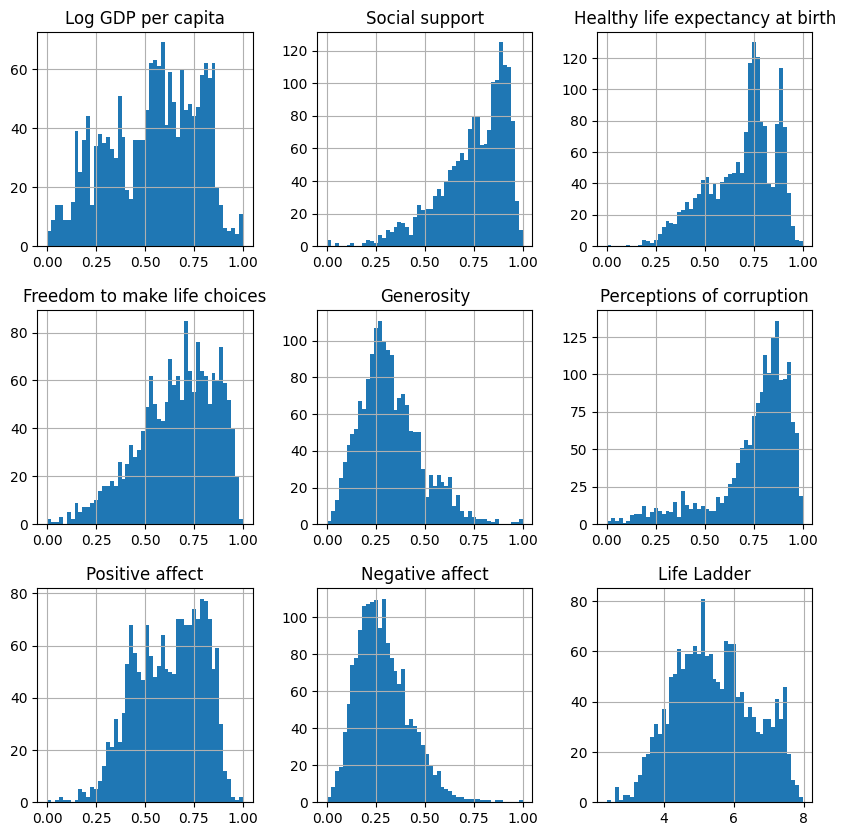

In [63]:
df.hist(bins=50,figsize=(10,10))

The histograms above depict that all attributes have been scaled accordingly.

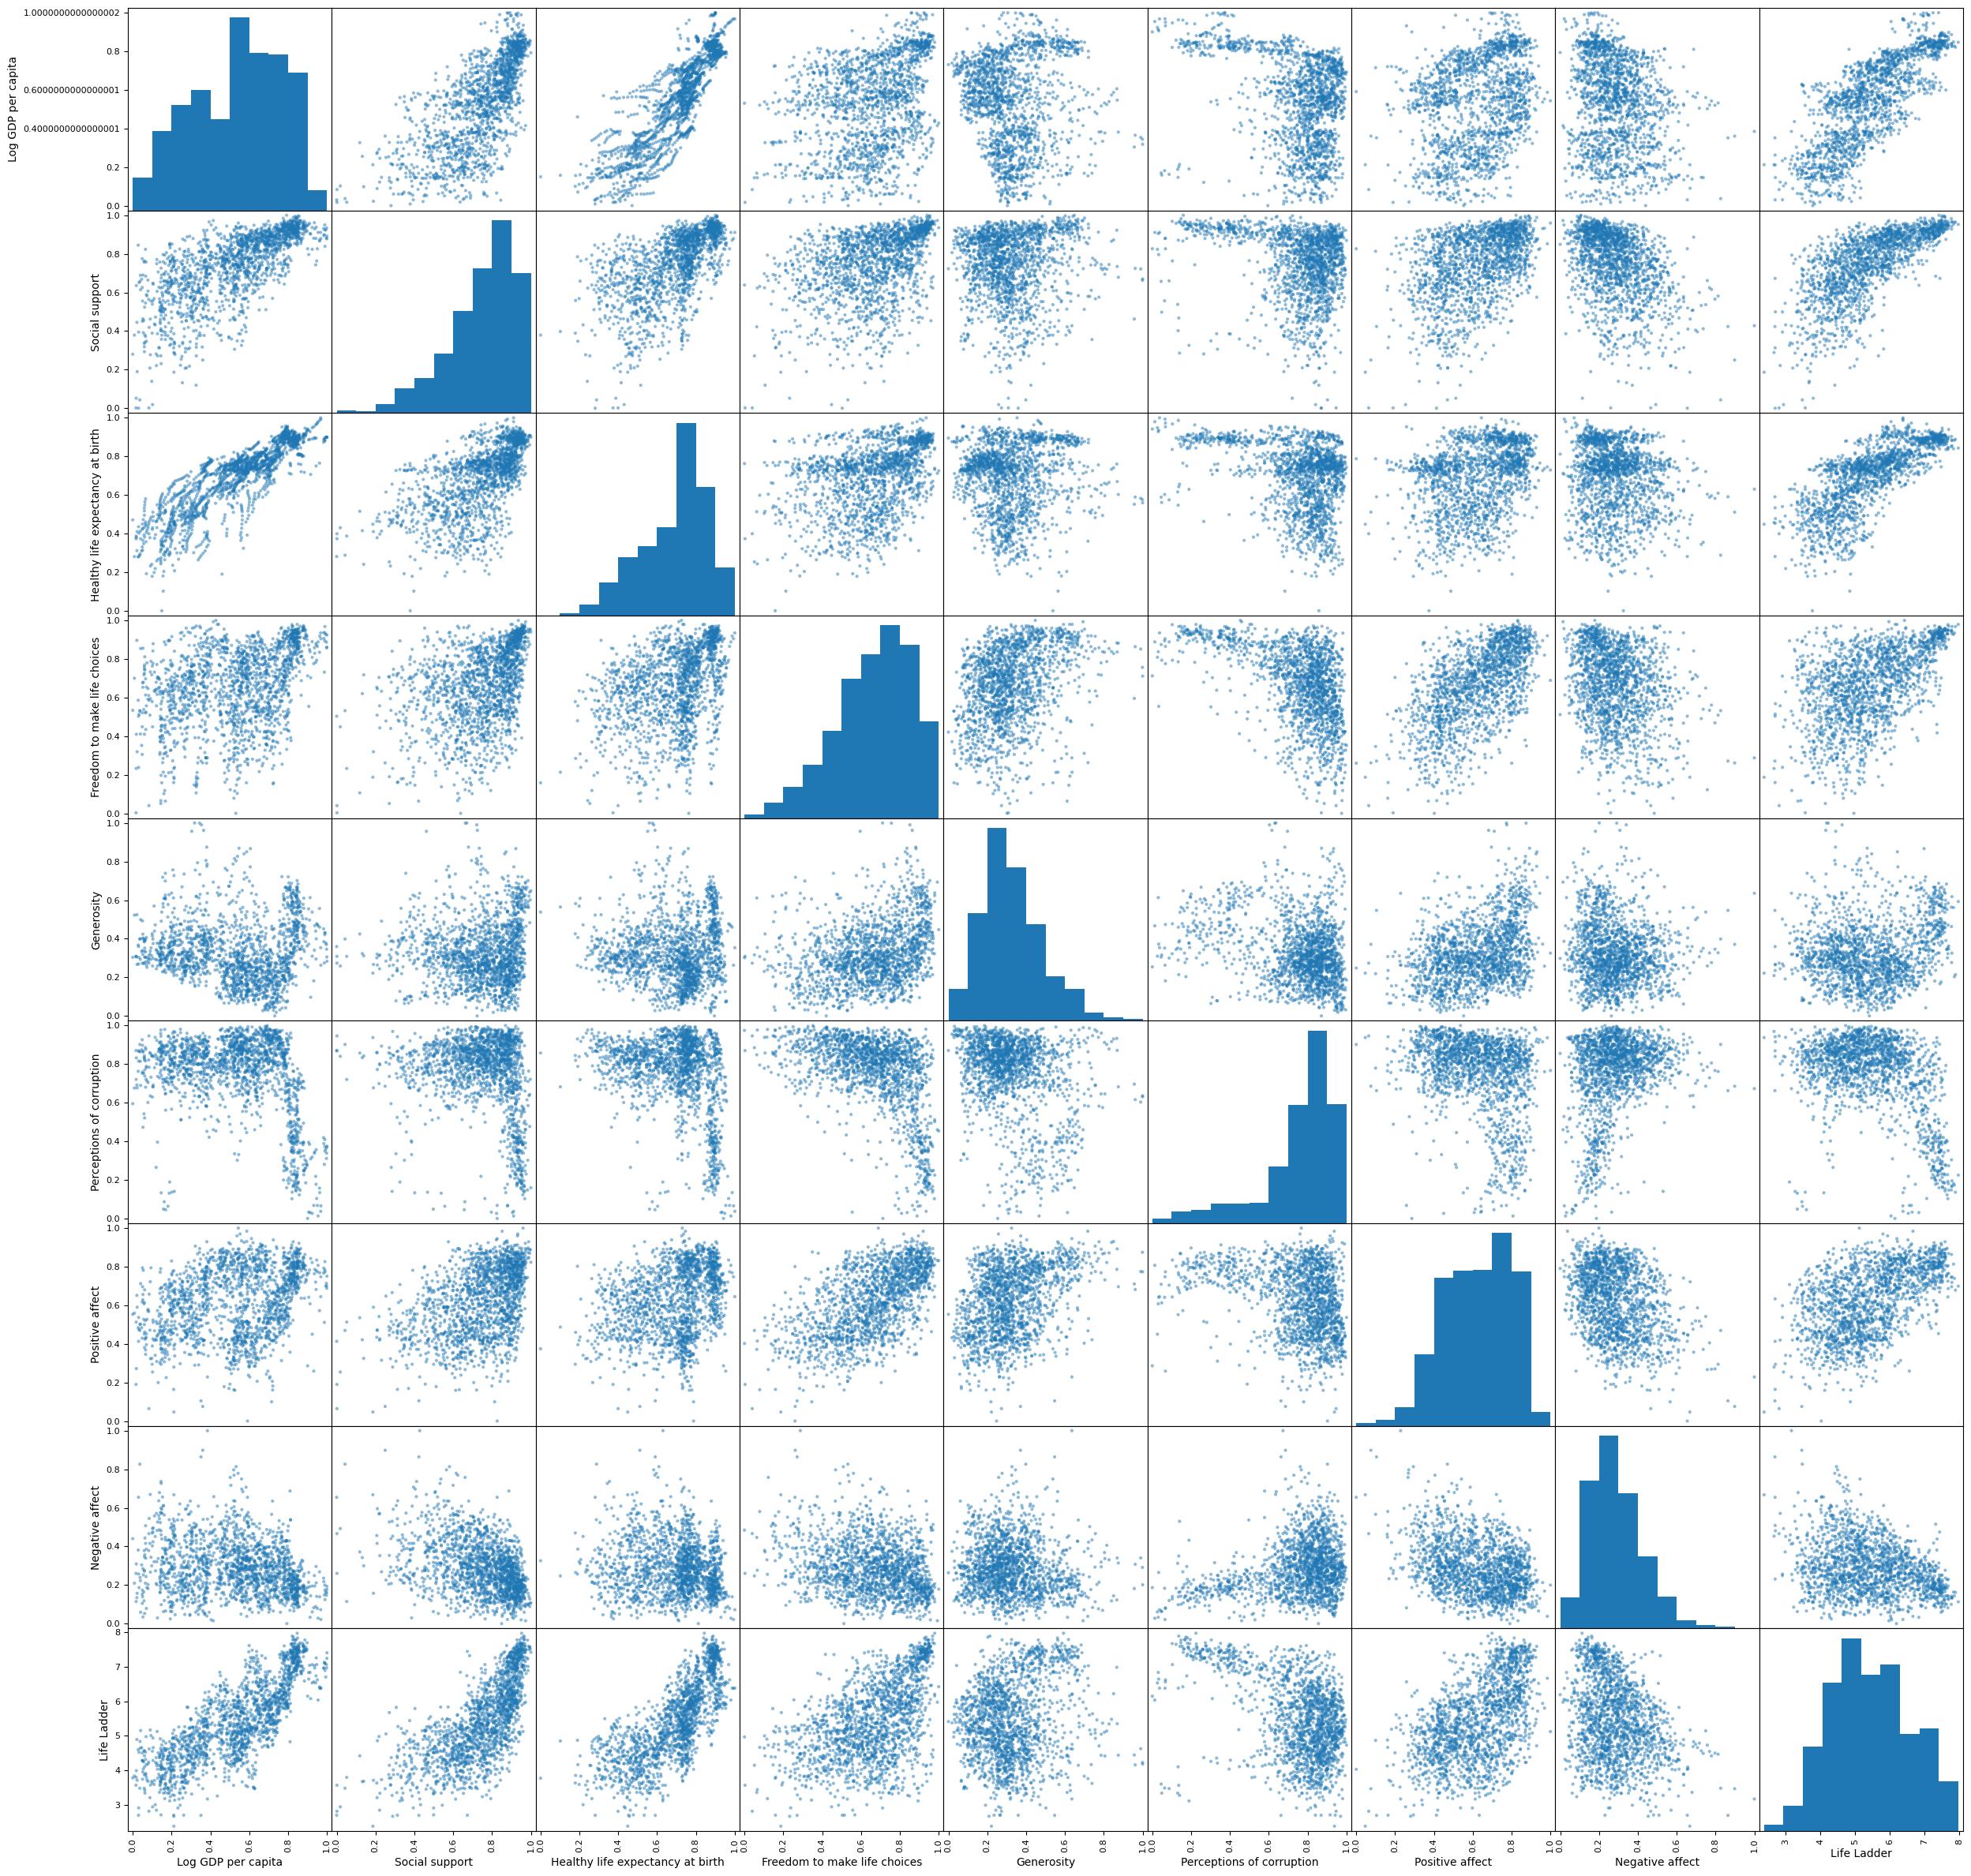

In [64]:
# Pearson Correlation Coefficient (PCC)
attributes = ['Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Life Ladder']
corr_matrix = df[attributes].corr()
# scatter plots
pd.plotting.scatter_matrix(df[attributes], figsize=(30, 30), diagonal='hist')
plt.show()

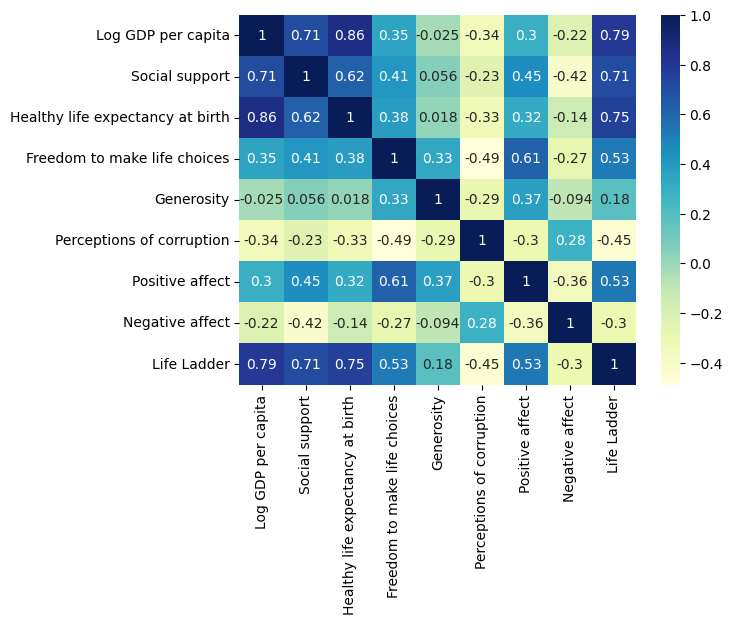

In [65]:
import seaborn as sb
import matplotlib.pyplot as mp
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

Pearson Correlation Coefficient (PCC) is a number between -1 and 1 which measures the strength and relationship between attributes.
a) When it is close to 1, it means that there is a strong positive correlation.
b) When it is close to -1, it means that there is a strong negative correlation
c) coefficients close to zero mean that there is no linear correlation
In the above we have performed correlation between all attributes and observed the following
1. 'Healthy life expectancy at birth' has very close correlation which is almost 85 percent with "Log GDP per capita" attribute
2. 'Social support', 'Positive affect' has average correlation which is around 50 percent
3. Remaining attributes have much less correlation with other attributes

In [66]:
df.shape

(1708, 9)

D) In this question, we have to create the test dataset by taking 20% of the entire data. However, we have to ensure that the test and the training (rest 80%) datasets are representative of the original dataset.

We do this by using the pandas groupby feature on the target attribute and make selections according to the size and distribution of each group.

In [67]:
test = df.groupby('Life Ladder', group_keys=False).apply(lambda x: x.sample(frac=0.2))


In [68]:
test.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
372             0.262717        0.486370                          0.492411   
36              0.475165        0.667145                          0.497768   
1910            0.362657        0.626973                          0.491071   
631             0.364053        0.512195                          0.537946   
970             0.619988        0.612626                          0.729018   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
372                       0.343879    0.254883                   0.847046   
36                        0.160935    0.163086                   0.842827   
1910                      0.551582    0.225586                   0.862869   
631                       0.678129    0.415039                   0.906118   
970                       0.365887    0.361328                   0.940928   

      Positive affect  Negative affect  Life Ladder  
372          0.562701         0.119476        3.476  
36           0.413183         0.448445        3.795  
1910         0.418006         0.350245        4.350  
631          0.556270         0.345336        4.514  
970          0.329582         0.443535        4.595

In [69]:
train = df.drop(test.index)
train.head()

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0            0.146619        0.230990                          0.412946   
1            0.180531        0.375897                          0.421875   
2            0.201875        0.357245                          0.430804   
3            0.196489        0.331420                          0.437946   
4            0.213445        0.331420                          0.445089   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.632737    0.491211                   0.893460   
1                      0.579092    0.512695                   0.859705   
2                      0.470426    0.445312                   0.708861   
3                      0.327373    0.485352                   0.734177   
4                      0.375516    0.557617                   0.781646   

   Positive affect  Negative affect  Life Ladder  
0         0.315113         0.268412        3.724  
1         0.421222         0.234043        4.402  
2         0.475884         0.296236        4.758  
3         0.464630         0.283142        3.832  
4         0.623794         0.284779        3.783

The next few cells show the shape of the total, training and test datasets, and plot the histograms to show the preserved nature of the distribution across all datasets.

In [70]:
df.shape, train.shape, test.shape

((1708, 9), (1666, 9), (42, 9))

<Axes: >

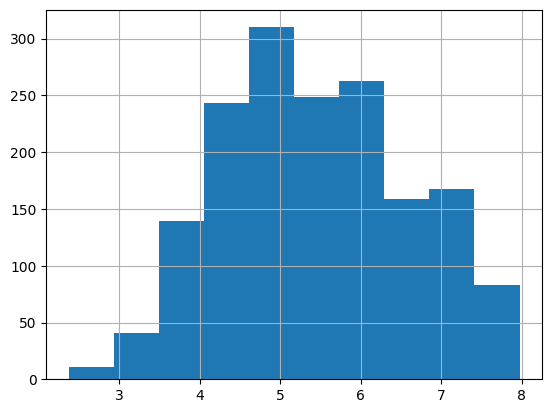

In [71]:
train['Life Ladder'].hist()

<Axes: >

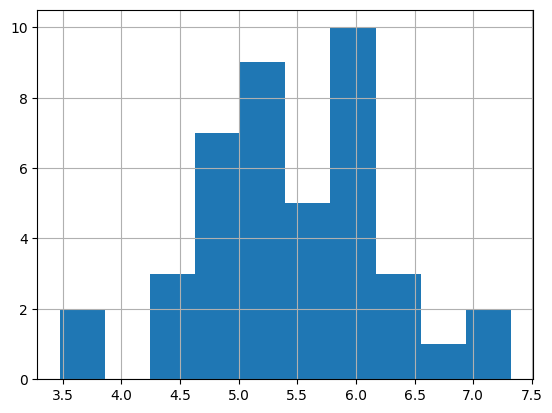

In [72]:
test['Life Ladder'].hist()

We create train and test label as trainY, trainX, testY, and testX, to segregate the target and the dependent attributes.

In [73]:
testY = test['Life Ladder']
testX = test.drop('Life Ladder', axis = 1)

In [74]:
testY.head()

372     3.476
36      3.795
1910    4.350
631     4.514
970     4.595
Name: Life Ladder, dtype: float64

In [75]:
trainY = train['Life Ladder']
trainX = train.drop('Life Ladder', axis = 1)

In [76]:
trainY.head()

0    3.724
1    4.402
2    4.758
3    3.832
4    3.783
Name: Life Ladder, dtype: float64

E & F) Now, we move to using various types of linear and polynomial regression methods to train on training data and predict the 'Life Ladder' of test data.

In [77]:
from sklearn.model_selection import KFold
from numpy import mean, std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

This cell shows the usage of linear regression with four-fold cross validation. We use the linear regression linearregression() and cross_val_score() from sklearn, and calculate & report the RMSE value of the method.

In [78]:
model = LinearRegression()
scores = cross_val_score(model, trainX, trainY, scoring='neg_root_mean_squared_error', cv=4, n_jobs=-1)

print('RMSE for 4 fold cross validation: %.3f' % (-mean(scores)))

RMSE for 4 fold cross validation: 0.569


In this section, we define all the functions that uses library-imported functions to conduct statistical and error analysis, and also plots the loss/learning curve of the training and cross-validation dataset.







In [79]:
# writing the RMSE and Cross validation functions and learning curves function to
#use later to compare the model
from sklearn.model_selection import train_test_split
# calculating the RMSE
def cal_rmse(reg_model):
   prediction = reg_model.predict(trainX)
   reg_mse = mean_squared_error(trainY, prediction)
   reg_rmse = np.sqrt(reg_mse)
   print("The RMSE of the model is " + str(reg_rmse) +"")
   return

# cross validation function

def cal_cross(reg_model):
  scores = cross_val_score(reg_model, trainX, trainY,scoring="neg_root_mean_squared_error", cv=4)
  print(f"{reg_model} | average RMSE:{-mean(scores)}")


def plot_learning_curves(model, X, y, epochs=100):
    X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2)
    train_errors, val_errors = [], []
    for epoch in range(1, epochs + 1):
        model.fit(X_train, y_train)
        y_train_predict = model.predict(X_train)
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    #plt.ylim((0.5,0.6))
    plt.legend()
    plt.show()

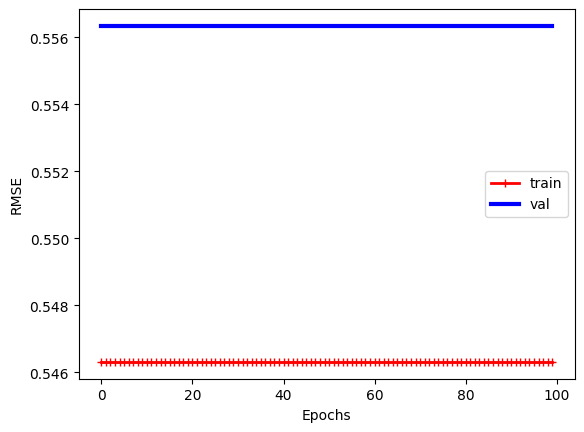

In [80]:
plot_learning_curves(model, trainX, trainY)

In the following section, we run the model using SGD Regressor with varying regularization of default, ridge, lasso and elastic net. In the default case, we experiment by changing the alpha hyperparamter between [0.0001,0.001,0.01,0.1,1]. The alpha hyperparamter is reprentative of the learning rate of the model.

In [81]:
 #With Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
# testing by altering various hypr parameters such as alpha, l1_ratio
scores_sgd_reg_1=cal_cross(SGDRegressor(alpha=0.0001))
scores_sgd_reg_2=cal_cross(SGDRegressor(alpha=0.001))
scores_sgd_reg_3=cal_cross(SGDRegressor(alpha=0.01))
scores_sgd_reg_3=cal_cross(SGDRegressor(alpha=0.1))
sgd_reg = SGDRegressor(alpha=1)
sgd_reg.fit(trainX, trainY)
cal_rmse(sgd_reg)

SGDRegressor() | average RMSE:0.5725120557775555
SGDRegressor(alpha=0.001) | average RMSE:0.5710665841871605
SGDRegressor(alpha=0.01) | average RMSE:0.5736613765789157
SGDRegressor(alpha=0.1) | average RMSE:0.6679249822323325
The RMSE of the model is 1.0339868585473257


Based on the output above, alpha = 0.001 gives the optimal RMSE value for the SGD Regressor method. So we continue to use that value across all regularizations.

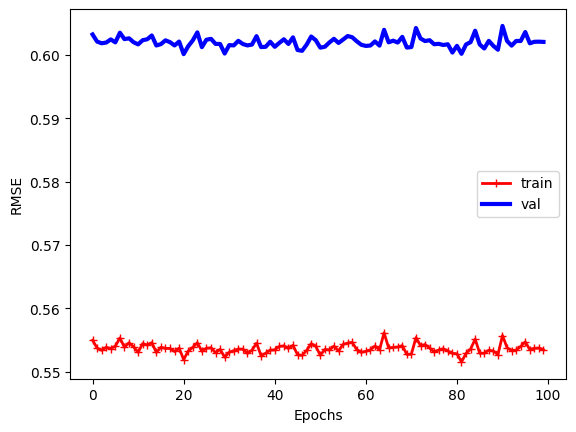

In [82]:
plot_learning_curves(SGDRegressor(alpha=0.001),trainX,trainY)

Ridge(alpha=0.001, solver='cholesky') | average RMSE:0.569193940788948
The RMSE of the model is 0.561566129112101


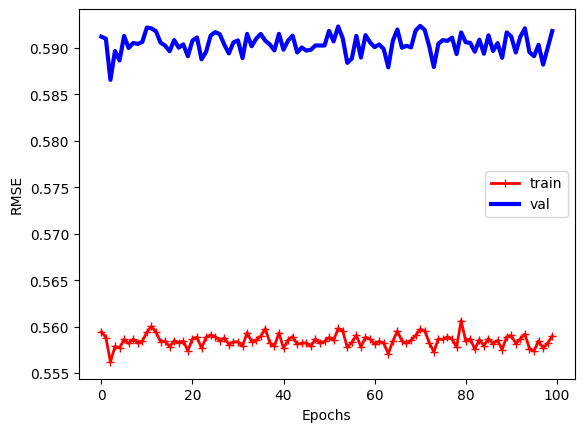

In [83]:
# Ridge Regularization
from sklearn.linear_model import Ridge
scores_ridge_reg_1=cal_cross(Ridge(alpha=0.001, solver="cholesky"))
ridge_reg = SGDRegressor(loss='squared_error',penalty='l2')
ridge_reg.fit(trainX, trainY)
cal_rmse(ridge_reg)
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l2'),trainX,trainY)

Lasso(alpha=0.001) | average RMSE:0.5692210870490255
The RMSE of the model is 0.5481921893789927


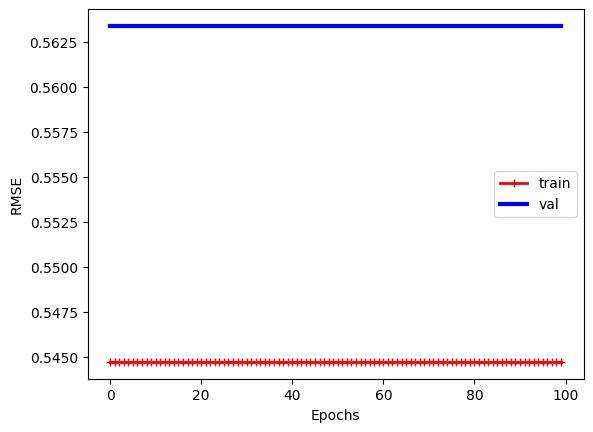

In [84]:
# Lasso Regularization
from sklearn.linear_model import Lasso
scores_lasso_reg_1=cal_cross(Lasso(alpha=0.001))
# scores_lasso_reg_2=cal_cross(Lasso(alpha=0.01))
# scores_lasso_reg_3=cal_cross(Lasso(alpha=0.01))
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(trainX, trainY)
cal_rmse(lasso_reg)
plot_learning_curves(Ridge(alpha=0.001, solver="cholesky"),trainX, trainY)

ElasticNet(alpha=0.001) | average RMSE:0.5686360518179152
The RMSE of the model is 0.5481178556960677


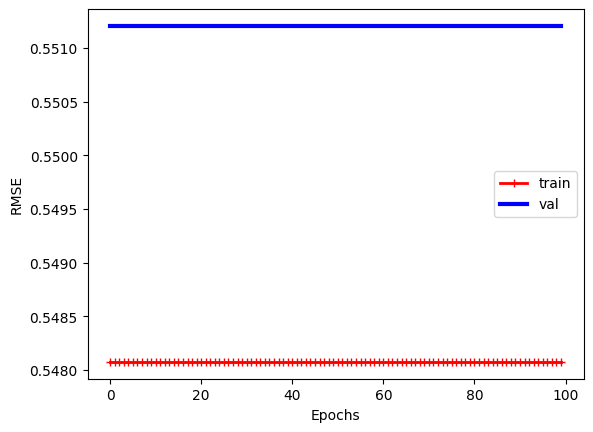

In [85]:
# Elastic Regularization
from sklearn.linear_model import ElasticNet
scores_elastic_net_1=cal_cross(ElasticNet(alpha=0.001))
# scores_elastic_net_2=cal_cross(ElasticNet(alpha=0.01, l1_ratio=0.30))
# scores_elastic_net_3=cal_cross(ElasticNet(alpha=0.001, l1_ratio=0.20))
elastic_net = ElasticNet(alpha=0.001)
elastic_net.fit(trainX, trainY)
cal_rmse(elastic_net)
plot_learning_curves(ElasticNet(alpha=0.001),trainX, trainY)

The elastic net regularization gives the most optimal RMSE value, followed by ridge and lasso.

Therefore, we use our model from elastic net on the test data to predict "Life Ladder".

ElasticNet(alpha=0.001) | average RMSE:0.5686360518179152
The RMSE of the model is 0.5481178556960677


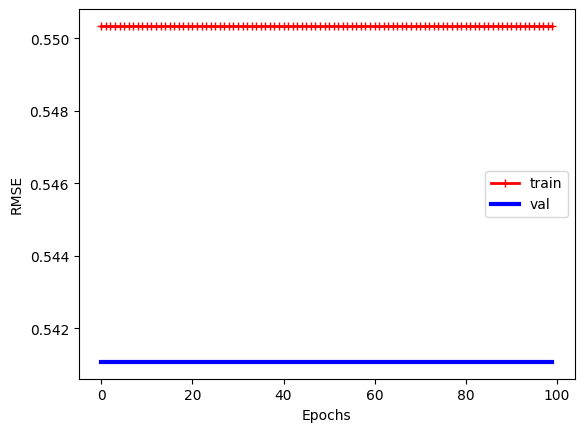

In [86]:
# Running on test data
from sklearn.linear_model import ElasticNet
scores_elastic_net_1=cal_cross(ElasticNet(alpha=0.001))
elastic_net = ElasticNet(alpha=0.001)
elastic_net.fit(trainX, trainY)
predicted_lin = elastic_net.predict(testX)
cal_rmse(elastic_net)
plot_learning_curves(ElasticNet(alpha=0.001),testX, testY)

The r square value is  0.8226213328455625


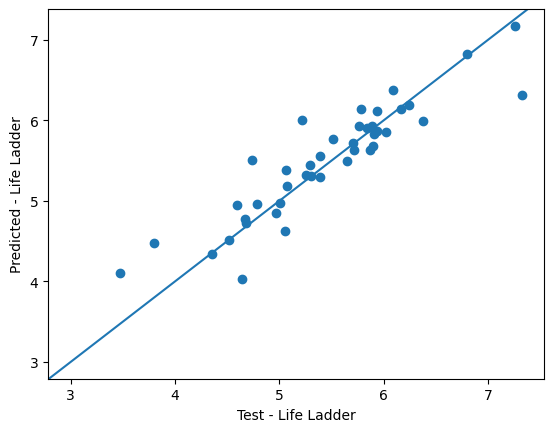

In [87]:
from sklearn.metrics import r2_score
print("The r square value is ",r2_score(testY, predicted_lin))

fig,axes = plt.subplots()
plt.scatter(testY,predicted_lin)
plt.axline((3, 3), slope=1)
plt.xlabel('Test - Life Ladder')
plt.ylabel('Predicted - Life Ladder')
plt.show()

The above plot shows that the linear model with elastic net predicts the 'Life ladder' pretty well for the test data with $R^2$ coefficient of 0.822 with average RMSE:0.5686.

In the following section, we run the polynomial regression with linear/SGD and varying regularization of ridge, lasso and elastic net. For learning rate alpha hyperparameter, the value of 0.01 gives the optimal RMSE in polynomial regression.

We print the RMSE value and plot the loss/learning curve between the training and validation data.

The $R^2$ coefficient shows the goodness of fit between the predicted and test values for the target variable "Life Ladder".

In [88]:
#Polynomial Regression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import math
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(trainX)
poly_reg = LinearRegression()
poly_reg.fit(X_poly,trainY)
predicted=poly_reg.predict(poly_features.transform(testX))
mse = mean_squared_error(testY, predicted)
rmse = math.sqrt(mse)
print("The r square value is ",r2_score(testY, predicted))
print(f'The RMSE of Polynomial Regression is {rmse}')


The r square value is  0.6660369755372753
The RMSE of Polynomial Regression is 0.4579585302828773


The r square value is  0.8241864360798495
The RMSE of SGDRegressor() is 0.33227919449650273


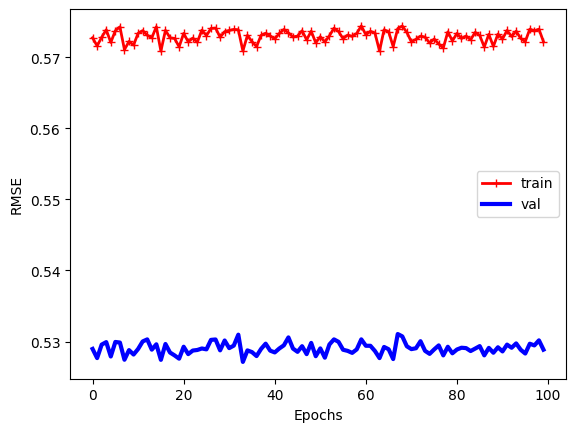

In [89]:
#SGDRegressor for polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(trainX)
poly_reg = SGDRegressor(loss='squared_error',penalty='l2')
poly_reg.fit(X_poly,trainY)
predicted=poly_reg.predict(poly_features.transform(testX))
mse = mean_squared_error(testY, predicted)
rmse = math.sqrt(mse)
print("The r square value is ",r2_score(testY, predicted))
print(f'The RMSE of {poly_reg} is {rmse}')
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l2', alpha = 0.01),X_poly,trainX)

The r square value is  0.8245793750569085
The RMSE of SGDRegressor(penalty='l1') is 0.3319076688924873


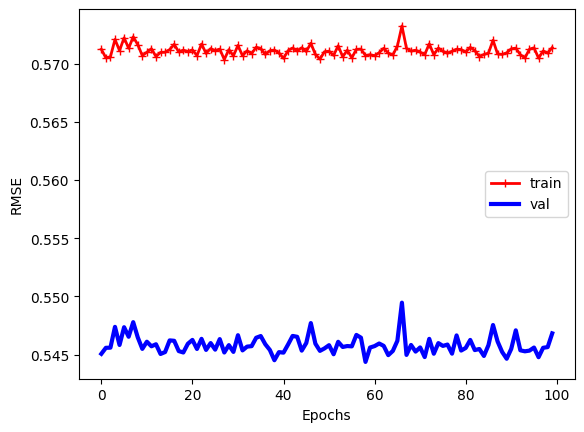

In [90]:
# Polynomial Regression with lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(trainX)
poly_reg = SGDRegressor(loss='squared_error',penalty='l1')
poly_reg.fit(X_poly,trainY)
predicted=poly_reg.predict(poly_features.transform(testX))
mse = mean_squared_error(testY, predicted)
rmse = math.sqrt(mse)
print("The r square value is ",r2_score(testY, predicted))
print(f'The RMSE of {poly_reg} is {rmse}')
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='l1', alpha = 0.01),X_poly,trainY)

The r square value is  0.824214793585095
The RMSE of SGDRegressor(penalty='elasticnet') is 0.3322523962541722


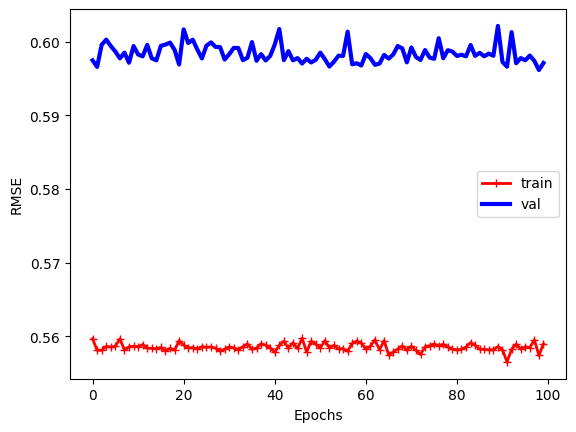

In [91]:
#elastic net
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(trainX)
poly_reg = SGDRegressor(loss='squared_error',penalty='elasticnet')
poly_reg.fit(X_poly,trainY)
predicted=poly_reg.predict(poly_features.transform(testX))
mse = mean_squared_error(testY, predicted)
rmse = math.sqrt(mse)
print("The r square value is ",r2_score(testY, predicted))
print(f'The RMSE of {poly_reg} is {rmse}')
plot_learning_curves(SGDRegressor(loss='squared_error',penalty='elasticnet', alpha = 0.01) ,X_poly,trainY)

In this run, ridge regularization gives the optimal RMSE value and has the best $R^2$ coefficient between the predicted and test data.


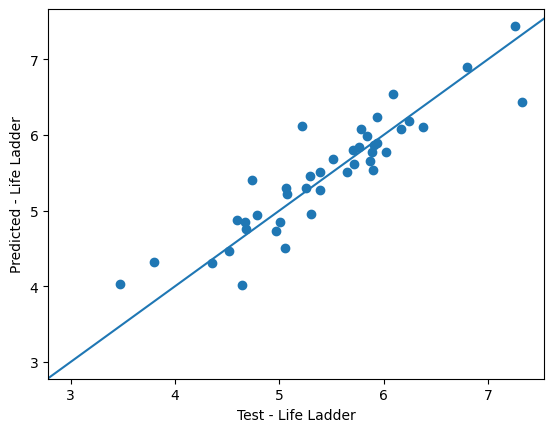

In [92]:
fig,axes = plt.subplots()
plt.scatter(testY,predicted)
plt.axline((3, 3), slope=1)
plt.xlabel('Test - Life Ladder')
plt.ylabel('Predicted - Life Ladder')
plt.show()

The above plot shows that the polynomial regression model with ridge regularization predicts the 'Life ladder' pretty well for the test data with $R^2$ coefficient of 0.824 with average RMSE:0.332.



this brings us to the conclusion that the polynomial regression model with ridge regularization and learning rate alpha = 0.01 gives us the optimal RMSE value with strong $R^2$ goodness of fit with the test data.

**Thoughts on improvement:**
If we could replace the missing NaN values with an appropriate substitution, instead of removing them, we would have even more instances to train and test the models on.

We tried using mean values of attributes as a suitable replacement but observed unfounded patterns in the distribution that could lead to unwarranted bias in the model runs.

Adding more polynomial features would increase the dimensionality and risk overfitting but if we perform feature selection on these new features we can select attributes and combination of attributes that potentially have more correlation with our target attribute.